# Analysis of the local Sherwood number

The local Sherwood number is analyzed for ellipsoidal, spherical cap, and dimpled ellipsoidal bubbles.

In [1]:
import helper_module as hm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline

data_path = "../data/single_phase/"
output_path = "../output/"

def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight")
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

In [2]:
# final simulation times
times = [10, 100, 100]
cases = ["wa18_l16", "scap_l16", "dell_l17"]
file_path_dir = [data_path + case + "/scalar_transport_1/" + str(time) + "/snGradT.csv" for case, time in zip(cases, times)]
file_path_slip = [data_path + case + "/scalar_transport_slip_1/" + str(time) + "/snGradT.csv" for case, time in zip(cases, times)]
dir_data = []
slip_data = []
names = ["x", "y", "A", "Sh"]
for i in range(3):
    dir_data.append(pd.read_csv(file_path_dir[i], header=0, names=names))
    slip_data.append(pd.read_csv(file_path_slip[i], header=0, names=names))
dir_data[0].head()

,x,y,A,Sh
0,0.397619,0.245938,0.000054,346.534344
1,0.151258,0.298297,0.000035,310.498024
2,0.151410,-0.324522,0.000024,1.427397
3,0.621075,0.051315,0.000095,388.948565
4,0.123624,0.301031,0.000018,305.223280


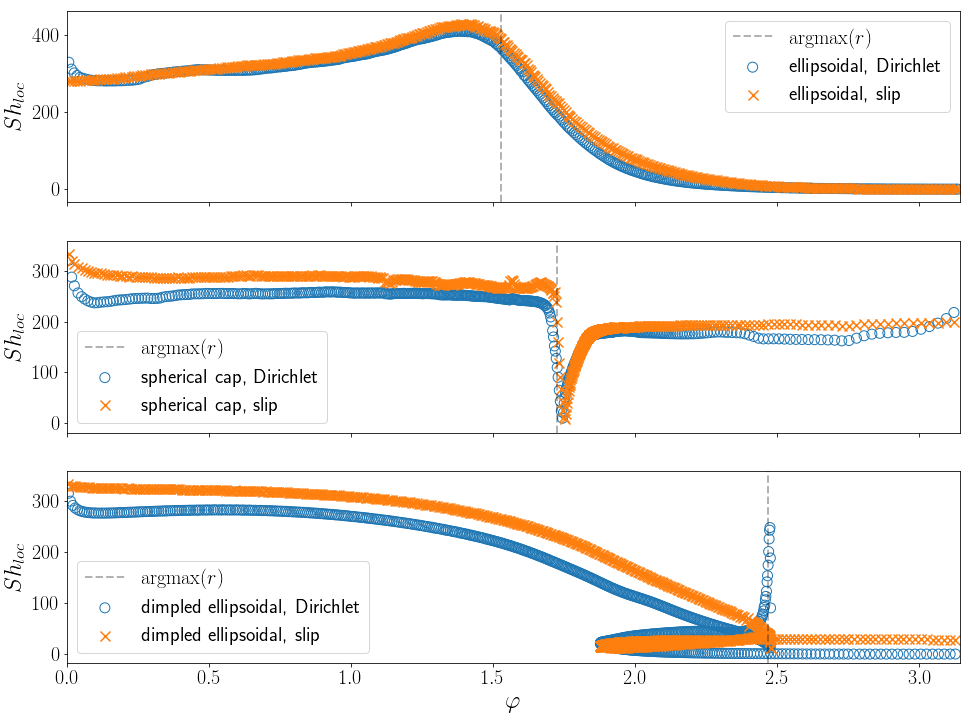

In [3]:
rc('text', usetex=True)
fig, ax = plt.subplots(3, 1, figsize=(hm.figure_width, 12), sharex=True)

labels = ["ellipsoidal", "spherical cap", "dimpled ellipsoidal"]

for i in range(3):
    rad, phi = hm.transform_polar_2D(dir_data[i].x.values, dir_data[i].y.values)
    ax[i].scatter(phi, dir_data[i].Sh.values, s=100, marker="o", facecolor='none', edgecolor="C0",
                  label="{}, Dirichlet".format(labels[i]))
    ax[i].scatter(phi, slip_data[i].Sh.values, s=100, marker="x", color="C1",
                  label="{}, slip".format(labels[i]))
    ax[i].set_ylabel(r"$Sh_{loc}$", fontsize=hm.fontsize_label)
    ax[i].tick_params(which='major', labelsize=hm.fontsize_tick)
    phi_max = phi[np.argmax(rad)]
    ax[i].axvline(phi_max, 0.0, 1.0, ls="--", lw=2, color="k", alpha=0.3, label=r"$\mathrm{argmax}(r)$")
    ax[i].legend(fontsize=hm.fontsize_legend)
    
ax[-1].set_xlabel(r"$\varphi$", fontsize=hm.fontsize_label)
ax[-1].set_xlim(0.0, np.pi)
savefig("local_sh_dir")